# 0. Setup Paths

In [1]:
import os

In [2]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [3]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [4]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [5]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [6]:
# https://www.tensorflow.org/install/source_windows

In [6]:
if os.name=='nt':
    !pip install wget
    import wget

In [7]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

Cloning into 'Tensorflow/models'...
remote: Enumerating objects: 58835, done.
remote: Counting objects: 100% (147/147), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 58835 (delta 83), reused 134 (delta 73), pack-reused 58688
Receiving objects: 100% (58835/58835), 573.39 MiB | 2.67 MiB/s, done.
Resolving deltas: 100% (40871/40871), done.


In [13]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

zsh:1: command not found: apt-get
zsh:1: command not found: protoc


In [61]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

Running tests under Python 3.8.5: /Users/kaoningyu/Desktop/Tensorflow_Detection/TFODCourse/tfod/bin/python
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2021-07-18 19:48:02.210235: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/kaoningyu/Desktop/Tensorflow_Detection/TFODCourse/tfod/lib/python3.8/site-packages/object_detection/builders/model_builder.py:1088: DeprecationWarning: The 'warn' function is deprecated, use 'warning' instead
  logging.warn(('Building experimental DeepMAC meta-arch.'
W0718 19:48:02.404121 4589678080 model_builder.py:1088] Building experimental DeepMAC meta-arch. Some features may be omitted.
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 0.

I0718 19:48:09.966288 4589678080 efficientnet_model.py:147] round_filter input=16 output=16
I0718 19:48:09.966415 4589678080 efficientnet_model.py:147] round_filter input=24 output=24
I0718 19:48:10.104741 4589678080 efficientnet_model.py:147] round_filter input=24 output=24
I0718 19:48:10.104862 4589678080 efficientnet_model.py:147] round_filter input=40 output=40
I0718 19:48:10.247642 4589678080 efficientnet_model.py:147] round_filter input=40 output=40
I0718 19:48:10.247796 4589678080 efficientnet_model.py:147] round_filter input=80 output=80
I0718 19:48:10.460244 4589678080 efficientnet_model.py:147] round_filter input=80 output=80
I0718 19:48:10.460376 4589678080 efficientnet_model.py:147] round_filter input=112 output=112
I0718 19:48:10.665695 4589678080 efficientnet_model.py:147] round_filter input=112 output=112
I0718 19:48:10.665817 4589678080 efficientnet_model.py:147] round_filter input=192 output=192
I0718 19:48:11.047306 4589678080 efficientnet_model.py:147] round_filter i

I0718 19:48:14.491508 4589678080 efficientnet_model.py:147] round_filter input=192 output=208
I0718 19:48:14.491636 4589678080 efficientnet_model.py:147] round_filter input=320 output=352
I0718 19:48:14.645272 4589678080 efficientnet_model.py:147] round_filter input=1280 output=1408
I0718 19:48:14.680647 4589678080 efficientnet_model.py:458] Building model efficientnet with params ModelConfig(width_coefficient=1.1, depth_coefficient=1.2, resolution=260, dropout_rate=0.3, blocks=(BlockConfig(input_filters=32, output_filters=16, kernel_size=3, num_repeat=1, expand_ratio=1, strides=(1, 1), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='depthwise'), BlockConfig(input_filters=16, output_filters=24, kernel_size=3, num_repeat=2, expand_ratio=6, strides=(2, 2), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='depthwise'), BlockConfig(input_filters=24, output_filters=40, kernel_size=5, num_repeat=2, expand_ratio=6, strides=(2, 2), se_ratio=0.25, id_skip=True, fused_conv=Fals

I0718 19:48:18.837151 4589678080 ssd_efficientnet_bifpn_feature_extractor.py:142] EfficientDet EfficientNet backbone version: efficientnet-b5
I0718 19:48:18.837275 4589678080 ssd_efficientnet_bifpn_feature_extractor.py:144] EfficientDet BiFPN num filters: 288
I0718 19:48:18.837339 4589678080 ssd_efficientnet_bifpn_feature_extractor.py:145] EfficientDet BiFPN num iterations: 7
I0718 19:48:18.838871 4589678080 efficientnet_model.py:147] round_filter input=32 output=48
I0718 19:48:18.851719 4589678080 efficientnet_model.py:147] round_filter input=32 output=48
I0718 19:48:18.851837 4589678080 efficientnet_model.py:147] round_filter input=16 output=24
I0718 19:48:19.012281 4589678080 efficientnet_model.py:147] round_filter input=16 output=24
I0718 19:48:19.012404 4589678080 efficientnet_model.py:147] round_filter input=24 output=40
I0718 19:48:19.339919 4589678080 efficientnet_model.py:147] round_filter input=24 output=40
I0718 19:48:19.340054 4589678080 efficientnet_model.py:147] round_fil

I0718 19:48:25.408936 4589678080 efficientnet_model.py:147] round_filter input=24 output=48
I0718 19:48:25.409041 4589678080 efficientnet_model.py:147] round_filter input=40 output=80
I0718 19:48:25.792150 4589678080 efficientnet_model.py:147] round_filter input=40 output=80
I0718 19:48:25.792243 4589678080 efficientnet_model.py:147] round_filter input=80 output=160
I0718 19:48:26.483741 4589678080 efficientnet_model.py:147] round_filter input=80 output=160
I0718 19:48:26.483840 4589678080 efficientnet_model.py:147] round_filter input=112 output=224
I0718 19:48:27.029723 4589678080 efficientnet_model.py:147] round_filter input=112 output=224
I0718 19:48:27.029866 4589678080 efficientnet_model.py:147] round_filter input=192 output=384
I0718 19:48:27.827698 4589678080 efficientnet_model.py:147] round_filter input=192 output=384
I0718 19:48:27.827826 4589678080 efficientnet_model.py:147] round_filter input=320 output=640
I0718 19:48:28.190966 4589678080 efficientnet_model.py:147] round_fi

In [60]:
!pip install pyyaml

  Using cached PyYAML-5.4.1-cp38-cp38-macosx_10_9_x86_64.whl (253 kB)


In [53]:
!pip install scipy

     |████████████████████████████████| 31.9 MB 1.6 MB/s eta 0:00:01


In [51]:
!pip install tf_slim

     |████████████████████████████████| 352 kB 1.4 MB/s eta 0:00:01


In [11]:
!pip install tensorflow --upgrade

  Using cached tensorflow-2.5.0-cp38-cp38-macosx_10_11_x86_64.whl (195.7 MB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached tensorflow_estimator-2.5.0-py2.py3-none-any.whl (462 kB)
  Using cached protobuf-3.17.3-cp38-cp38-macosx_10_9_x86_64.whl (1.0 MB)
  Using cached absl_py-0.13.0-py3-none-any.whl (132 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached wrapt-1.12.1-cp38-cp38-macosx_10_9_x86_64.whl
  Using cached six-1.15.0-py2.py3-none-any.whl (10 kB)
  Using cached numpy-1.19.5-cp38-cp38-macosx_10_9_x86_64.whl (15.6 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached grpcio-1.34.1-cp38-cp38-macosx_10_10_x86_64.whl (3.7 MB)
  Using cached tensorboard-2.5.0-py3-none-any.whl (6.0 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached h5py-3.1.0-cp38-cp38-macosx_10_9_x86_64.whl (2.9 MB)
  Using cached keras_nightly-2.5.0.dev202

In [23]:
!pip uninstall protobuf matplotlib -y
!pip install protobuf matplotlib==3.2

Found existing installation: protobuf 3.17.3
Uninstalling protobuf-3.17.3:
  Successfully uninstalled protobuf-3.17.3
Found existing installation: matplotlib 3.2.0
Uninstalling matplotlib-3.2.0:
  Successfully uninstalled matplotlib-3.2.0
  Using cached protobuf-3.17.3-cp38-cp38-macosx_10_9_x86_64.whl (1.0 MB)
  Using cached matplotlib-3.2.0-cp38-cp38-macosx_10_9_x86_64.whl (12.4 MB)


In [42]:
!pip install object_detection --upgrade

In [63]:
import object_detection

In [62]:
!pip list

Package                 Version
----------------------- -------------------
absl-py                 0.13.0
appnope                 0.1.2
argon2-cffi             20.1.0
astunparse              1.6.3
async-generator         1.10
attrs                   21.2.0
backcall                0.2.0
bleach                  3.3.1
cachetools              4.2.2
certifi                 2021.5.30
cffi                    1.14.6
charset-normalizer      2.0.3
contextlib2             21.6.0
cycler                  0.10.0
Cython                  0.29.24
debugpy                 1.3.0
decorator               5.0.9
defusedxml              0.7.1
entrypoints             0.3
flatbuffers             1.12
gast                    0.4.0
google-auth             1.33.0
google-auth-oauthlib    0.4.4
google-pasta            0.2.0
grpcio                  1.34.1
h5py                    3.1.0
idna                    3.2
ipykernel               6.0.2
ipython                 7.25.0
ipython-genutils        0.2.0
ipywidgets     

In [64]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

--2021-07-18 20:02:40--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 172.217.24.16
Connecting to download.tensorflow.org (download.tensorflow.org)|172.217.24.16|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19.56M  1.31MB/s    in 14s     

2021-07-18 20:02:55 (1.38 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’ saved [20515344/20515344]

x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckp

# 2. Create Label Map

In [71]:
labels = [{'name':'TumbsUp', 'id':1}, {'name':'TumbsDown', 'id':2}, {'name':'Okay', 'id':3}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 3. Create TF records

In [66]:
# OPTIONAL IF RUNNING ON COLAB
ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
if os.path.exists(ARCHIVE_FILES):
  !tar -zxvf {ARCHIVE_FILES}

In [67]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

Cloning into 'Tensorflow/scripts'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 1 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


In [69]:
!pip install pandas

  Using cached pandas-1.3.0-cp38-cp38-macosx_10_9_x86_64.whl (11.4 MB)
  Using cached pytz-2021.1-py2.py3-none-any.whl (510 kB)


In [72]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow/workspace/annotations/train.record
Successfully created the TFRecord file: Tensorflow/workspace/annotations/test.record


# 4. Copy Model Config to Training Folder

In [73]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

# 5. Update Config For Transfer Learning

In [74]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [75]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [76]:
config

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matc

In [77]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [78]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [79]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# 6. Train the model

In [80]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [81]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=2000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [82]:
print(command)

python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_ssd_mobnet --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config --num_train_steps=2000


In [ ]:
!{command}

# 7. Evaluate the Model

In [83]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [84]:
print(command)

python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_ssd_mobnet --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config --checkpoint_dir=Tensorflow/workspace/models/my_ssd_mobnet


In [22]:
!{command}

^C


# 8. Load Train Model From Checkpoint

In [85]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [86]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-3')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

2021-07-19 03:40:42.646135: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# 9. Detect from an Image

In [87]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [88]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [89]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'okay.82134982-e76a-11eb-846b-acde48001122.jpg')

2021-07-19 03:43:17.110253: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


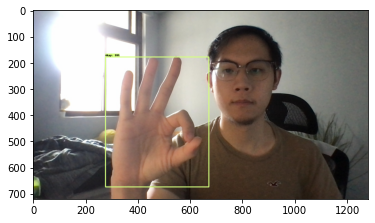

In [90]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

# 10. Real Time Detections from your Webcam

In [91]:
!pip uninstall opencv-python-headless -y

In [92]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

# 10. Freezing the Graph

In [93]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [94]:
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])

In [95]:
print(command)

python Tensorflow/models/research/object_detection/exporter_main_v2.py  --input_type=image_tensor --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config --trained_checkpoint_dir=Tensorflow/workspace/models/my_ssd_mobnet --output_directory=Tensorflow/workspace/models/my_ssd_mobnet/export


In [96]:
!{command}

2021-07-19 03:49:51.769573: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W0719 03:49:51.915539 4653395456 deprecation.py:596] From /Users/kaoningyu/Desktop/Tensorflow_Detection/TFODCourse/tfod/lib/python3.8/site-packages/tensorflow/python/autograph/impl/api.py:463: calling map_fn_v2 (from tensorflow.python.ops.map_fn) with back_prop=False is deprecated and will be removed in a future version.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.


W0719 03:50:08.231235 4653395456 save_impl.py:76] Skipping full serialization of Keras layer <object_detection.core.freezable_batch_norm.FreezableBatchNorm object at 0x7ff83d714df0>, because it is not built.
W0719 03:50:08.231304 4653395456 save_impl.py:76] Skipping full serialization of Keras layer <tensorflow.python.keras.layers.core.Lambda object at 0x7ff83d714ca0>, because it is not built.
W0719 03:50:08.231375 4653395456 save_impl.py:76] Skipping full serialization of Keras layer <object_detection.core.freezable_batch_norm.FreezableBatchNorm object at 0x7ff83d7148e0>, because it is not built.
W0719 03:50:08.232243 4653395456 save_impl.py:76] Skipping full serialization of Keras layer <tensorflow.python.keras.layers.core.Lambda object at 0x7ff83d76f4c0>, because it is not built.
W0719 03:50:08.232346 4653395456 save_impl.py:76] Skipping full serialization of Keras layer <object_detection.core.freezable_batch_norm.FreezableBatchNorm object at 0x7ff83d791af0>, because it is not built

# 11. Conversion to TFJS

In [97]:
!pip install tensorflowjs

     |████████████████████████████████| 64 kB 969 kB/s eta 0:00:01
  Using cached tensorflow_hub-0.12.0-py2.py3-none-any.whl (108 kB)


In [98]:
command = "tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default {} {}".format(os.path.join(paths['OUTPUT_PATH'], 'saved_model'), paths['TFJS_PATH'])

In [99]:
print(command)

tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default Tensorflow/workspace/models/my_ssd_mobnet/export/saved_model Tensorflow/workspace/models/my_ssd_mobnet/tfjsexport


In [100]:
!{command}

2021-07-19 03:51:18.822807: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-07-19 03:51:29.435965: I tensorflow/core/grappler/devices.cc:78] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0 (Note: TensorFlow was not compiled with CUDA or ROCm support)
2021-07-19 03:51:29.436838: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2021-07-19 03:51:29.785520: I tensorflow/core/grappler/optimizers/meta_optimizer.cc:1144] Optimization results for grappler item: graph_to_optimize
  function_optimizer: Graph size after: 3778 nodes (3369), 8138 edges (7722), time = 220.867ms.
  function_optimizer: function_optimizer did nothing. time = 7.055ms.

2021-07-19 03:51:34.137867: I t

In [ ]:
# Test Code: https://github.com/nicknochnack/RealTimeSignLanguageDetectionwithTFJS

# 12. Conversion to TFLite

In [101]:
TFLITE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'export_tflite_graph_tf2.py ')

In [102]:
command = "python {} --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(TFLITE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['TFLITE_PATH'])

In [103]:
print(command)

python Tensorflow/models/research/object_detection/export_tflite_graph_tf2.py  --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config --trained_checkpoint_dir=Tensorflow/workspace/models/my_ssd_mobnet --output_directory=Tensorflow/workspace/models/my_ssd_mobnet/tfliteexport


In [104]:
!{command}

2021-07-19 03:52:28.815547: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
W0719 03:52:37.575417 4557999616 save_impl.py:76] Skipping full serialization of Keras layer <object_detection.meta_architectures.ssd_meta_arch.SSDMetaArch object at 0x7feef0175700>, because it is not built.
W0719 03:52:37.788060 4557999616 save_impl.py:76] Skipping full serialization of Keras layer <tensorflow.python.keras.layers.convolutional.SeparableConv2D object at 0x7feef01f93a0>, because it is not built.
W0719 03:52:37.788216 4557999616 save_impl.py:76] Skipping full serialization of Keras layer <object_detection.core.freezable_batch_norm.FreezableBatchNorm object at 0x7feed1a556a0>, because it is not built.
W0719 03:52:37.788303 4557999616 sa

2021-07-19 03:52:46.883306: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
W0719 03:53:01.903864 4557999616 save.py:238] Found untraced functions such as WeightSharedConvolutionalBoxPredictor_layer_call_and_return_conditional_losses, WeightSharedConvolutionalBoxPredictor_layer_call_fn, WeightSharedConvolutionalBoxHead_layer_call_and_return_conditional_losses, WeightSharedConvolutionalBoxHead_layer_call_fn, WeightSharedConvolutionalBoxPredictor_layer_call_fn while saving (showing 5 of 260). These functions will not be directly callable after loading.
/Users/kaoningyu/Desktop/Tensorflow_Detection/TFODCourse/tfod/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask l

In [105]:
FROZEN_TFLITE_PATH = os.path.join(paths['TFLITE_PATH'], 'saved_model')
TFLITE_MODEL = os.path.join(paths['TFLITE_PATH'], 'saved_model', 'detect.tflite')

In [106]:
command = "tflite_convert \
--saved_model_dir={} \
--output_file={} \
--input_shapes=1,300,300,3 \
--input_arrays=normalized_input_image_tensor \
--output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
--inference_type=FLOAT \
--allow_custom_ops".format(FROZEN_TFLITE_PATH, TFLITE_MODEL, )

In [107]:
print(command)

tflite_convert --saved_model_dir=Tensorflow/workspace/models/my_ssd_mobnet/tfliteexport/saved_model --output_file=Tensorflow/workspace/models/my_ssd_mobnet/tfliteexport/saved_model/detect.tflite --input_shapes=1,300,300,3 --input_arrays=normalized_input_image_tensor --output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' --inference_type=FLOAT --allow_custom_ops


In [108]:
!{command}

2021-07-19 03:54:11.686536: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-07-19 03:54:23.597022: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:345] Ignored output_format.
2021-07-19 03:54:23.597047: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:348] Ignored drop_control_dependency.
2021-07-19 03:54:23.597054: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:354] Ignored change_concat_input_ranges.
2021-07-19 03:54:23.598942: I tensorflow/cc/saved_model/reader.cc:38] Reading SavedModel from: Tensorflow/workspace/models/my_ssd_mobnet/tfliteexport/saved_model
2021-07-19 03:54:23.709854: I tensorflow/cc/saved_model/reader.cc:90] Reading meta graph with tags { 

# 13. Zip and Export Models 

In [ ]:
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')